In [2]:
#%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import psycopg2 
from config import user_value, password_value, host_value, port_value, database_value 
 

In [3]:
connection = psycopg2.connect(user = user_value,
                        password = password_value,
                        host = host_value,
                        port = port_value,
                        database = database_value)

cursor = connection.cursor()
pgSQL_select_Query = 'SELECT ts.title, \
                        round(AVG(s.Salary),2) FROM public."Salaries" AS s \
                        JOIN public."Titles" as ts ON (s.emp_no = ts.emp_no) group by ts.title'
cursor.execute(pgSQL_select_Query)
title_df = pd.DataFrame(cursor.fetchall(), columns=['Titles','Averages'])
title_df


,Titles,Averages
0,Assistant Engineer,48493.20
1,Engineer,48539.78
2,Manager,51531.04
3,Senior Engineer,48506.75
4,Senior Staff,58503.29
5,Staff,58465.27
6,Technique Leader,48580.51


In [4]:
title_df['Averages'] = pd.to_numeric(title_df['Averages'])
title_df

,Titles,Averages
0,Assistant Engineer,48493.20
1,Engineer,48539.78
2,Manager,51531.04
3,Senior Engineer,48506.75
4,Senior Staff,58503.29
5,Staff,58465.27
6,Technique Leader,48580.51


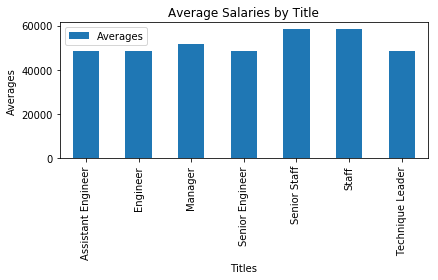

In [6]:
title_df.plot.bar(x ='Titles', y='Averages', title ="Average Salaries by Title")
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel("Titles")
plt.ylabel("Averages")
plt.savefig('images/Avg_SalariesbyTitle.png')
plt.show()



Technical Report
 
Reviewed the CSV files to obtain the fields needed to create the tables schemas, identify the primary and foreign keys along with any constraints. Created an ERD using the quickdatabase diagram tool.  Exported the ERD image file and the table schemas to later import into PostgreSQL.
 
For the Bonus portion of the assignment, psycogp2 module was installed to facilitate a successful connection to the PostgreSQL database. Created a panda data frame and used a SQL query to extract the data needed to plot a bar graph using matplotlib.